<a href="https://colab.research.google.com/github/Soedirman-Machine-Learning/experiment-repo/blob/master/imdb_top.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import bs4
import requests
import pandas as pd
from pprint import pprint
import math
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [0]:
url = 'https://www.imdb.com/search/title/?count=250&groups=top_1000&sort=user_rating'

In [0]:
def get_page_contents(url):
    page = requests.get(url, headers={'Accept-Language': 'en-US'})
    return bs4.BeautifulSoup(page.text, 'html.parser')

In [0]:
soup = get_page_contents(url)

In [0]:
movies = soup.findAll('div', class_='lister-item mode-advanced')

In [0]:
scol = ['Title', 'Year', 'Run time', 'IMDB rating', 'Genre', 'Audience rating', 'Votes', 'Earnings', 'Directors', 'Actors']
summary = pd.DataFrame(columns = scol)

In [0]:
for movie in movies:
    content = movie.find('div', class_='lister-item-content')
    header = content.find('h3', class_='lister-item-header')
    title = header.find('a').text
    year = header.find('span', class_='lister-item-year text-muted unbold').text
    year = re.findall('\d+', year)[0]
    runtime = content.find('span', class_='runtime').text
    ratingsbar = content.find('div', class_='ratings-bar')
    imdb_rating = ratingsbar.find('div', class_='inline-block ratings-imdb-rating')['data-value']
    genre = content.find('span', class_='genre').text.strip()
    try:
        audience_rating = content.find('span', class_='certificate').text
    except:
        audience_rating = math.nan
    num_votes = content.findAll('span', attrs={'name':'nv'})[0]['data-value']
    try:
        gross_value = content.findAll('span', attrs={'name':'nv'})[1]['data-value']
    except:
        gross_value = math.nan
    dirlist = []
    actlist = []
    crewblock = content.find('p', class_='')
    crewtags = crewblock.findAll()
    foundspan = False
    for tag in crewtags:
        if tag.name == 'a' and not foundspan:
            dirlist.append(tag.text)
        if tag.name == 'a' and foundspan:
            actlist.append(tag.text)
        if 'span' in tag.name:
            foundspan = True
    directors = ', '.join(dirlist)
    actors = ', '.join(actlist)
    
    new_row = pd.Series([title, year, runtime, imdb_rating, genre, audience_rating, num_votes, gross_value, directors, actors], index=summary.columns)
    summary = summary.append(new_row, ignore_index=True)

In [0]:
summary

,Title,Year,Run time,IMDB rating,Genre,Audience rating,Votes,Earnings,Directors,Actors
0,The Shawshank Redemption,1994,142 min,9.3,Drama,R,2171762,"28,341,469",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,1972,175 min,9.2,"Crime, Drama",R,1496082,"134,966,411",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,The Dark Knight,2008,152 min,9,"Action, Crime, Drama",PG-13,2155933,"534,858,444",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,The Godfather: Part II,1974,202 min,9,"Crime, Drama",R,1047359,"57,300,000",Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian..."
4,The Lord of the Rings: The Return of the King,2003,201 min,8.9,"Adventure, Drama, Fantasy",PG-13,1545165,"377,845,905",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or..."
...,...,...,...,...,...,...,...,...,...,...
245,The Legend of 1900,1998,169 min,8.1,"Drama, Music, Romance",R,54869,"259,127",Giuseppe Tornatore,"Tim Roth, Pruitt Taylor Vince, Mélanie Thierry..."
246,The Truman Show,1998,103 min,8.1,"Comedy, Drama, Sci-Fi",PG,866232,"125,618,201",Peter Weir,"Jim Carrey, Ed Harris, Laura Linney, Noah Emme..."
247,"Black Cat, White Cat",1998,127 min,8.1,"Comedy, Crime, Romance",R,48109,"348,660",Emir Kusturica,"Bajram Severdzan, Srdjan 'Zika' Todorovic, Bra..."
248,The Big Lebowski,1998,117 min,8.1,"Comedy, Crime, Sport",R,682845,"17,498,804","Joel Coen, Ethan Coen","Jeff Bridges, John Goodman, Julianne Moore, St..."


In [0]:
summary.to_csv('imdb_top.csv')

In [0]:
yrate = summary[['Year', 'IMDB rating']].dropna().astype('float')

In [0]:
rtrate = summary[['Run time', 'IMDB rating']]
rtrate['Run time'] = rtrate['Run time'].apply(lambda x: re.findall('\d+', x)[0])
rtrate = rtrate.dropna().astype('float')

C:\Users\flori\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
monrate = summary[['Earnings', 'IMDB rating']].dropna()
monrate['Earnings'] = monrate['Earnings'].apply(lambda x: re.findall('\d+', x)[0])
monrate = monrate.astype('float')

In [0]:
votrate = summary[['Votes', 'IMDB rating']].dropna()
votrate['Votes'] = votrate['Votes'].apply(lambda x: re.findall('\d+', x)[0])
votrate = votrate.astype('float')

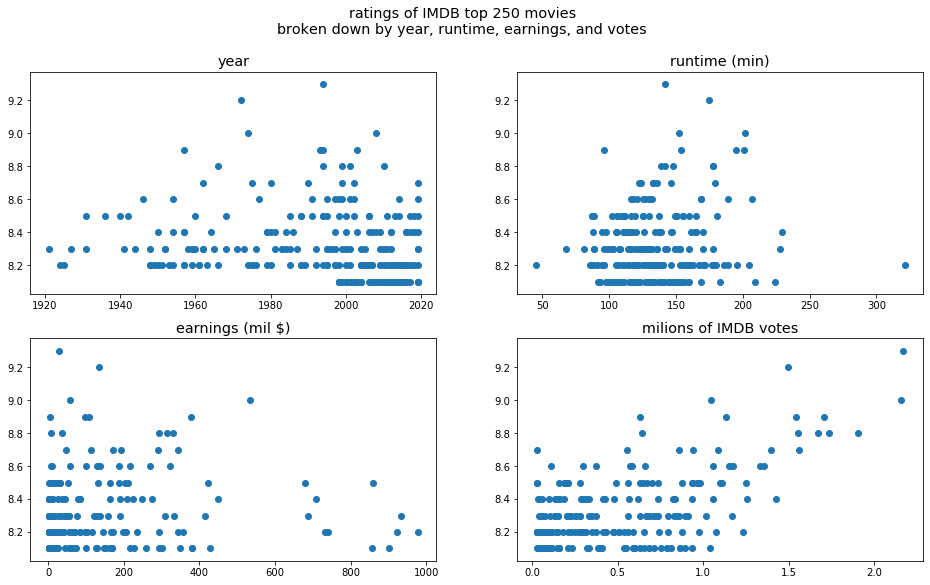

In [0]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,9))
plt.rcParams.update({'font.size': 12})
fig.suptitle('ratings of IMDB top 250 movies\nbroken down by year, runtime, earnings, and votes')

ax1.scatter(yrate['Year'], yrate['IMDB rating'])
ax1.set_title('year')
ax2.scatter(rtrate['Run time'], rtrate['IMDB rating'])
ax2.set_title('runtime (min)')
ax3.scatter(monrate['Earnings'], monrate['IMDB rating'])
ax3.set_title('earnings (mil $)')
ax4.scatter(votrate['Votes'] / 10**6, votrate['IMDB rating'])
ax4.set_title('milions of IMDB votes')

plt.show()